ön işleme adımları
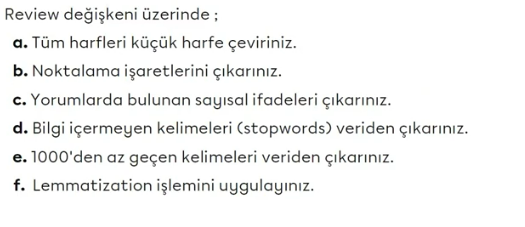

In [207]:
import os
print(os.path.exists("amazon/amazon.xlsx"))


False


In [208]:
import pandas as pd
data = pd.read_excel(r"C:\Users\murat\OneDrive\Masaüstü\NLP\amazon\amazon.xlsx")
print(data.head())




   Star  HelpFul                                          Title  \
0     5        0                                    looks great   
1     5        0  Pattern did not align between the two panels.   
2     5        0               Imagery is stretched. Still fun.   
3     5        0                 Que se ven elegantes muy finas   
4     5        0                             Wow great purchase   

                                              Review  
0                                      Happy with it  
1  Good quality material however the panels are m...  
2  Product was fun for bedroom windows.<br />Imag...  
3   Lo unico que me gustaria es que sean un poco ...  
4  Great bang for the buck I can't believe the qu...  


In [209]:
reviewdf=data['Review']
print(reviewdf)

0                                           Happy with it
1       Good quality material however the panels are m...
2       Product was fun for bedroom windows.<br />Imag...
3        Lo unico que me gustaria es que sean un poco ...
4       Great bang for the buck I can't believe the qu...
                              ...                        
5606    Great product for reasonable money.  Delivered...
5607             Color is way off and panels do not match
5608    These are great for my studio as they compleme...
5609    Brought out the beauty in kids room. They love...
5610    Very cute curtains in my sons room! Thick enou...
Name: Review, Length: 5611, dtype: object


In [210]:
data['Review']=data['Review'].str.lower()

In [211]:
data['Review']=data['Review'].str.replace('[^\w\s]', '')


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\murat\AppData\Local\Temp\ipykernel_36940\2607983276.py:1: SyntaxWarning: invalid escape sequence '\w'
  data['Review']=data['Review'].str.replace('[^\w\s]', '')


In [212]:
data['Review']=data['Review'].str.replace('/d','')

In [213]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

sw = stopwords.words('english')


data['Review']=data['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))

print(f"stopword yok:{data['Review']}")


stopword yok:0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme studio/li...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object


In [214]:
words=data['Review'].apply(lambda x:x.split())

print(words)

# Tek bir listeye dönüştür
all_words = [word for review in words for word in review]

print(all_words)

# Kelime sayısını al
word_counts = pd.Series(all_words).value_counts()
print("----------------------")
print(word_counts[word_counts>1000])
words_counts=word_counts[word_counts>1000]


0                                                 [happy]
1       [good, quality, material, however, panels, mis...
2       [product, fun, bedroom, windows.<br, />imagery...
3       [lo, unico, que, gustaria, es, que, sean, un, ...
4       [great, bang, buck, can't, believe, quality, m...
                              ...                        
5606    [great, product, reasonable, money., delivered...
5607                          [color, way, panels, match]
5608    [great, studio, complement, entire, theme, stu...
5609            [brought, beauty, kids, room., love, it.]
5610    [cute, curtains, sons, room!, thick, enough, k...
Name: Review, Length: 5611, dtype: object
['happy', 'good', 'quality', 'material', 'however', 'panels', 'mis-matched.', 'product', 'fun', 'bedroom', 'windows.<br', '/>imagery', 'bit', 'stretched,', 'still', 'fun.<br', '/>material', 'lightweight', 'sheer,', 'appreciate.', 'lo', 'unico', 'que', 'gustaria', 'es', 'que', 'sean', 'un', 'poco', 'mas', 'largas', 'gre

In [215]:
#lemmatization
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [216]:
# Gerekli kaynakları indirin (bir kez çalıştırılması yeterlidir)
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [217]:
# Lemmatizer'ı oluştur
lemmatizer = WordNetLemmatizer()

# Birinci sütunu (kelimeleri) almak
kelimeler = words_counts.index.tolist()

print(kelimeler)


['love', 'curtains', 'like']


In [218]:
kelimeler_lem=[lemmatizer.lemmatize(kelime) for kelime in kelimeler]
print(kelimeler_lem)

['love', 'curtain', 'like']


METİN GÖRSELLEŞTİRME

In [219]:

import pandas as pd
data = pd.read_excel(r"C:\Users\murat\OneDrive\Masaüstü\NLP\amazon\amazon.xlsx")
print(data.head())



   Star  HelpFul                                          Title  \
0     5        0                                    looks great   
1     5        0  Pattern did not align between the two panels.   
2     5        0               Imagery is stretched. Still fun.   
3     5        0                 Que se ven elegantes muy finas   
4     5        0                             Wow great purchase   

                                              Review  
0                                      Happy with it  
1  Good quality material however the panels are m...  
2  Product was fun for bedroom windows.<br />Imag...  
3   Lo unico que me gustaria es que sean un poco ...  
4  Great bang for the buck I can't believe the qu...  


In [220]:
data_words=data['Review'].apply(lambda x:str(x).split())
print(data_words)

words=[word for row in data_words for word in row]
print(words)

word_counts=pd.Series(words).value_counts()
print("-------------------")


word_counts=word_counts[word_counts>500]
print(word_counts)

0                                       [Happy, with, it]
1       [Good, quality, material, however, the, panels...
2       [Product, was, fun, for, bedroom, windows.<br,...
3       [Lo, unico, que, me, gustaria, es, que, sean, ...
4       [Great, bang, for, the, buck, I, can't, believ...
                              ...                        
5606    [Great, product, for, reasonable, money., Deli...
5607    [Color, is, way, off, and, panels, do, not, ma...
5608    [These, are, great, for, my, studio, as, they,...
5609    [Brought, out, the, beauty, in, kids, room., T...
5610    [Very, cute, curtains, in, my, sons, room!, Th...
Name: Review, Length: 5611, dtype: object
['Happy', 'with', 'it', 'Good', 'quality', 'material', 'however', 'the', 'panels', 'are', 'mis-matched.', 'Product', 'was', 'fun', 'for', 'bedroom', 'windows.<br', '/>Imagery', 'a', 'bit', 'stretched,', 'but', 'still', 'fun.<br', '/>Material', 'is', 'not', 'lightweight', 'sheer,', 'which', 'I', 'appreciate.', 'Lo', 'un

In [221]:
word_counts_df = word_counts.reset_index()
word_counts_df.columns = ['word', 'count']  # Sütun adlarını değiştirme

# Sonucu yazdır
print(word_counts_df)

        word  count
0        the   5983
1          I   4413
2        and   3523
3          a   2780
4         to   2467
5         is   1857
6        are   1743
7         in   1685
8         my   1655
9         it   1609
10       for   1546
11        of   1506
12  curtains   1203
13       but   1138
14        as   1086
15       The   1070
16      they   1049
17       not   1045
18       was   1006
19      like    987
20     these    939
21      them    928
22        on    877
23      with    871
24        so    848
25      love    788
26      look    785
27      very    765
28      They    754
29      have    729
30      this    725
31      that    689
32      room    667
33   quality    563
34     These    525
35   curtain    514
36      just    511


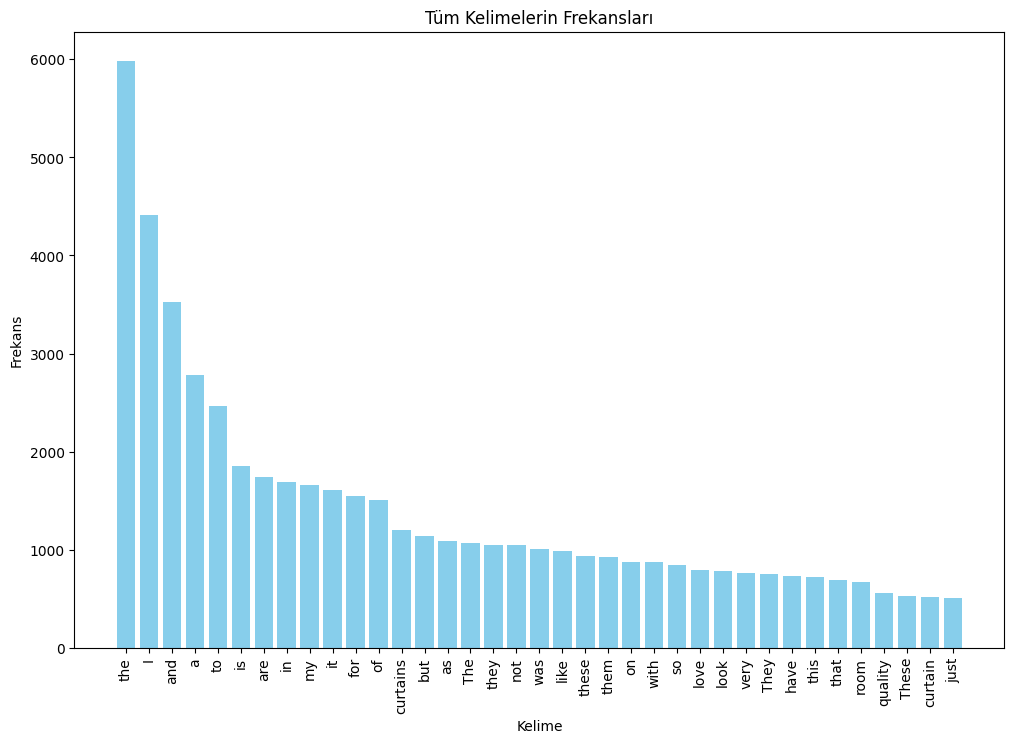

In [222]:
import matplotlib.pyplot as plt

# Bar plot çizdir
plt.figure(figsize=(12, 8))
plt.bar(word_counts_df['word'], word_counts_df['count'], color='skyblue')  # Tüm kelimeleri al
plt.xlabel('Kelime')
plt.ylabel('Frekans')
plt.title('Tüm Kelimelerin Frekansları')
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndür
plt.show()

In [223]:

!pip install wordcloud matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


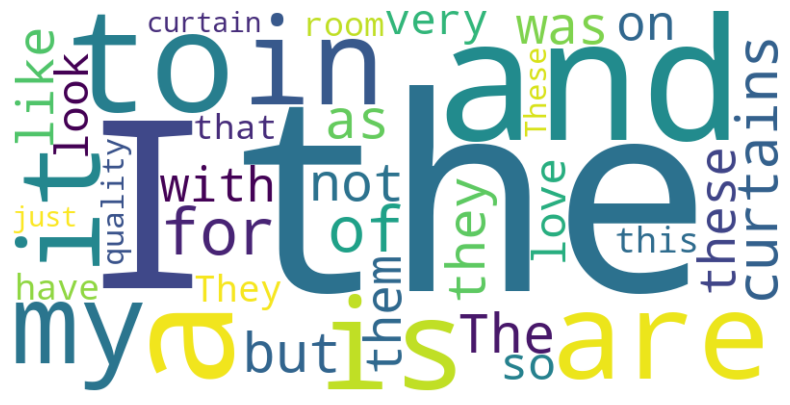

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Kelimeleri ve frekansları bir sözlük olarak oluştur
word_freq = dict(zip(word_counts_df['word'], word_counts_df['count']))

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Kelime bulutunu çizdir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri kapat
plt.show()

sentiment analizi

Review değişkeninin ilk 10 gözlemini polarite_score() hesaplayınız.

İncelenen ilk 10 gözlem için compound skorlarına göre filtreleyerek tekrar gözlemleyiniz.

10 gözlem için compound skoru 0'dan büyükse "pos" değeri, 0'dan küçükse "neg" şeklinde güncelleyiniz.

Review değişkenindeki tüm gözlemleri için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz.

In [225]:
import pandas as pd
data = pd.read_excel(r"C:\Users\murat\OneDrive\Masaüstü\NLP\amazon\amazon.xlsx")
print(data.head())

   Star  HelpFul                                          Title  \
0     5        0                                    looks great   
1     5        0  Pattern did not align between the two panels.   
2     5        0               Imagery is stretched. Still fun.   
3     5        0                 Que se ven elegantes muy finas   
4     5        0                             Wow great purchase   

                                              Review  
0                                      Happy with it  
1  Good quality material however the panels are m...  
2  Product was fun for bedroom windows.<br />Imag...  
3   Lo unico que me gustaria es que sean un poco ...  
4  Great bang for the buck I can't believe the qu...  


In [226]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [227]:
# İlk 10 yorumu duygu analizine tabi tut
if isinstance(data, pd.DataFrame):  # DataFrame olduğunu doğrula
    for review in data['Review'].head(10):
        # Yorumun string olduğundan emin olun
        review_text = str(review)
        scores = sia.polarity_scores(review_text)
        print(f"Yorum: {review_text}\nDuygu Skorları: {scores}\n")
else:
    print("Hata: 'data' bir DataFrame değil!")

Yorum: Happy with it
Duygu Skorları: {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

Yorum: Good quality material however the panels are mis-matched.
Duygu Skorları: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

Yorum: Product was fun for bedroom windows.<br />Imagery a bit stretched, but still fun.<br />Material is not lightweight sheer, which I appreciate.
Duygu Skorları: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.6908}

Yorum:  Lo unico que me gustaria es que sean un poco mas largas
Duygu Skorları: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Yorum: Great bang for the buck I can't believe the quality of the material. Vibrant colors. I have a very eclectic style and this works beautifully and ties it all together for me.
Duygu Skorları: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9042}

Yorum: Looks different then photo
Duygu Skorları: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Yorum: Was exactly what i was lo

In [228]:
#gözelemlerden compound 0.5 büyük olanlar
# İlk 10 yorumu duygu analizine tabi tut
if isinstance(data, pd.DataFrame):  # DataFrame olduğunu doğrula
    for review in data['Review'].head(10):
        # Yorumun string olduğundan emin olun
        review_text = str(review)
        scores = sia.polarity_scores(review_text)
        if scores['compound']>= 0.5:
           print(f"Yorum: {review_text}\nDuygu Skorları: {scores}\n")
else:
    print("Hata: 'data' bir DataFrame değil!")

Yorum: Happy with it
Duygu Skorları: {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

Yorum: Product was fun for bedroom windows.<br />Imagery a bit stretched, but still fun.<br />Material is not lightweight sheer, which I appreciate.
Duygu Skorları: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.6908}

Yorum: Great bang for the buck I can't believe the quality of the material. Vibrant colors. I have a very eclectic style and this works beautifully and ties it all together for me.
Duygu Skorları: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9042}

Yorum: Was exactly what i was looking for. Heavy material. Great for price and ships fast.
Duygu Skorları: {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}

Yorum: Looking at the picture, I thought these curtains would be thinner and more sheer. But they are a very nice thickness/ weight and they help insulate my front window. The look is absolutely PERFECT!! They arrived very quickly. I am VERY VERY p

In [229]:
#gözelemlerden compound 0.5 büyük olanlar
# İlk 10 yorumu duygu analizine tabi tut
if isinstance(data, pd.DataFrame):  # DataFrame olduğunu doğrula
    for review in data['Review'].head(10):
        # Yorumun string olduğundan emin olun
        review_text = str(review)
        scores = sia.polarity_scores(review_text)
        if scores['compound']>= 0:
           print(f"Yorum  pos: {review_text}\nDuygu Skorları: {scores}\n")
        else:
            print(f"Yorum  neg: {review_text}\nDuygu Skorları: {scores}\n")  
else:
    print("Hata: 'data' bir DataFrame değil!")

Yorum  pos: Happy with it
Duygu Skorları: {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

Yorum  pos: Good quality material however the panels are mis-matched.
Duygu Skorları: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

Yorum  pos: Product was fun for bedroom windows.<br />Imagery a bit stretched, but still fun.<br />Material is not lightweight sheer, which I appreciate.
Duygu Skorları: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.6908}

Yorum  pos:  Lo unico que me gustaria es que sean un poco mas largas
Duygu Skorları: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Yorum  pos: Great bang for the buck I can't believe the quality of the material. Vibrant colors. I have a very eclectic style and this works beautifully and ties it all together for me.
Duygu Skorları: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9042}

Yorum  pos: Looks different then photo
Duygu Skorları: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Yo

In [230]:
#yeni bir sütun tanımladım
data['compound'] = None  
index=0

if isinstance(data, pd.DataFrame):  # DataFrame olduğunu doğrula
    for review in data['Review']:
        # Yorumun string olduğundan emin olun
        review_text = str(review)
        scores = sia.polarity_scores(review_text)
        if scores['compound']>= 0:
           data.loc[index, 'compound'] =  "pos"#pos
        else:
           data.loc[index, 'compound'] = "yes"#neg
        index=index+1   
else:
    print("Hata: 'data' bir DataFrame değil!")

In [231]:
print(data['compound'])

0       pos
1       pos
2       pos
3       pos
4       pos
       ... 
5606    pos
5607    pos
5608    pos
5609    pos
5610    pos
Name: compound, Length: 5611, dtype: object


Makine öğrenmesine hazırık

In [232]:
# NaN olan hücreleri boş string ("") ile değiştir
data['Review'] = data['Review'].fillna("")

y=data['compound']
X=data['Review']

#buradaki compound pozitif ve negatiflik durumuna göre yorumların duygu durumu öğrenilecek



#tf-ıdf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

# İlk belgenin vektör temsili
print(f"****{X_tf_idf_word[0]}")

# Dense (yoğun) formatta göstermek içi=>İlk belgenin tüm özellikler (kelimeler) için TF-IDF değerlerini gösterir.
print("\nDense format:")
print(X_tf_idf_word[0].toarray())

import numpy as np
from sklearn.preprocessing import StandardScaler


# Z-Score Normalizasyonu (Standartlaştırma)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_tf_idf_word.toarray())  # .toarray() ile yoğun formata dönüştür




****  (0, 2447)	0.7605858281129498
  (0, 5917)	0.5256467721475074
  (0, 2831)	0.3810573040956499

Dense format:
[[0. 0. 0. ... 0. 0. 0.]]


In [237]:
#!!  sentiment  modelling machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split

lg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_normalized,y,train_size=0.9,random_state=42,shuffle=True)

model=lg.fit(X_train,y_train)
#!!  sentiment  modelling machine learning
predict_model=model.predict(X_test)




In [238]:
from sklearn.metrics import accuracy_score

# Tahmin sonuçlarını karşılaştırma ve doğruluğu hesaplama
accuracy = accuracy_score(y_test, predict_model)
print(f"Doğruluk: {accuracy}")

Doğruluk: 0.8896797153024911


In [243]:
#bir cümle ile model değerlendirmesi

yeniyorum=TfidfVectorizer().fit(X).transform(["this is shit shut up bad bad the worst"])
print(yeniyorum)
predict=model.predict(yeniyorum)
print(predict)

  (0, 469)	0.6625697625776421
  (0, 2823)	0.1409489869668103
  (0, 4765)	0.4889225311422164
  (0, 5311)	0.09661513043855804
  (0, 5355)	0.1665803700052941
  (0, 5622)	0.20446381948487438
  (0, 5955)	0.4724409960547684
['pos']
